# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
#include "includeLibraries.h"
#include <opencv2/opencv.hpp>
#include "matplotlibcpp.h"
#include "displayImages.h"

In [2]:
using namespace std;

In [3]:
using namespace cv;

In [4]:
using namespace matplotlibcpp;

In [5]:
Mat pencilSketch(Mat image, int arguments=0){
    
    Mat pencilSketchImage;
    
    /// YOUR CODE HERE
    // Apply Laplacian to image to get edges
    int kernelSize = 5;
    Mat LOG, img1;
    cvtColor(image, img1, COLOR_BGR2GRAY);
    GaussianBlur(img1, img1, Size(3,3), 0, 0);
    Laplacian(img1, LOG, CV_32F, kernelSize, 1, 0);
    normalize(LOG, pencilSketchImage, 0, 1, NORM_MINMAX, CV_32F);
    
    // Threshold the image to mimic pencil marks
    pencilSketchImage = pencilSketchImage * 255;
    threshold( pencilSketchImage, pencilSketchImage, 148, 255, THRESH_BINARY_INV );

    return pencilSketchImage;
}

In [6]:
Mat cartoonify(Mat image, int arguments=0){
    
    /// YOUR CODE HERE
    Mat cartoonImage;

    //diameter of the pixel neighbourhood used during filtering
    int dia=15;   

    // Larger the value the distant colours will be mixed together 
    // to produce areas of semi equal colors
    int sigmaColor=100; 

    // Larger the value more the influence of the farther placed pixels 
    // as long as their colors are close enough
    int sigmaSpace=30; 

    // Apply bilateral filter
    Mat tempImage = image.clone();
    bilateralFilter(image, tempImage, dia, 
                  sigmaColor, 
                  sigmaSpace);

    Mat edges = pencilSketch(image);

    tempImage.convertTo(tempImage, CV_8UC3);
    edges.convertTo(edges, CV_8UC1);
    cout << edges.size() << endl;
    cout << tempImage.size() << endl;
    bitwise_and(tempImage, tempImage, cartoonImage, edges);
    
    return cartoonImage;
    
}

In [9]:
string imagePath = DATA_PATH + "images/trump.jpg";
Mat image = imread(imagePath);

Mat cartoonImage = cartoonify(image);
Mat pencilSketchImage = pencilSketch(image);

[500 x 573]
[500 x 573]


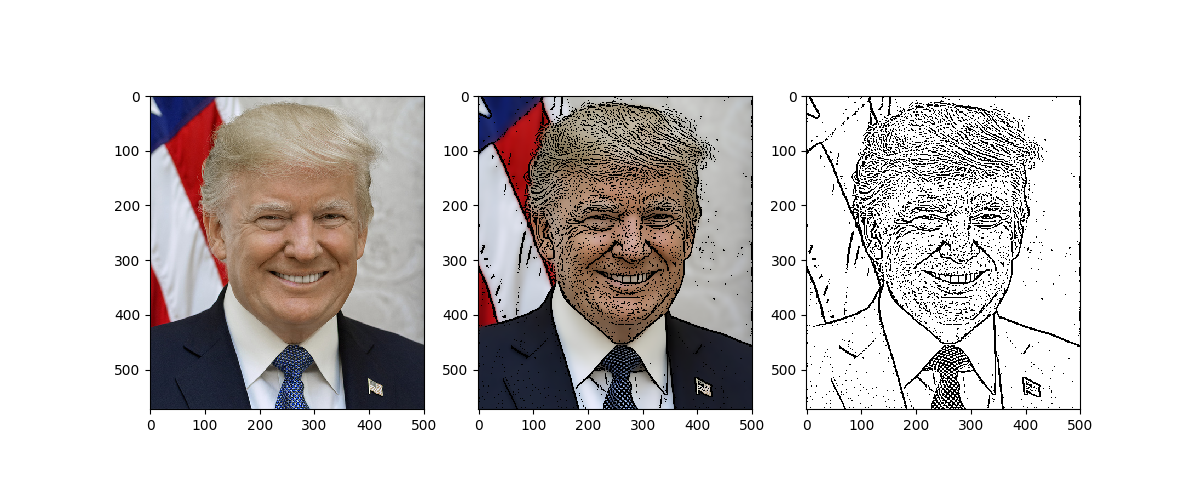

In [10]:
plt::figure_size(1200,500);
plt::subplot(1,3,1);
plt::imshow(image);
auto pltImg = displayImage(image);
plt::subplot(1,3,2);
plt::imshow(cartoonImage);
pltImg = displayImage(cartoonImage);
plt::subplot(1,3,3);
plt::imshow(pencilSketchImage);
pltImg = displayImage(pencilSketchImage);
pltImg